In [1]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Nobel= pd.read_csv("nobel.csv")
Nobel.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [3]:
Nobel.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country'],
      dtype='object')

In [6]:
# What is the most commonly awarded gender and birth country?
top_gender =  Nobel['sex'].value_counts().index[0]
print("The gender with the most Nobel laureates is :", top_gender)

The gender with the most Nobel laureates is : Male


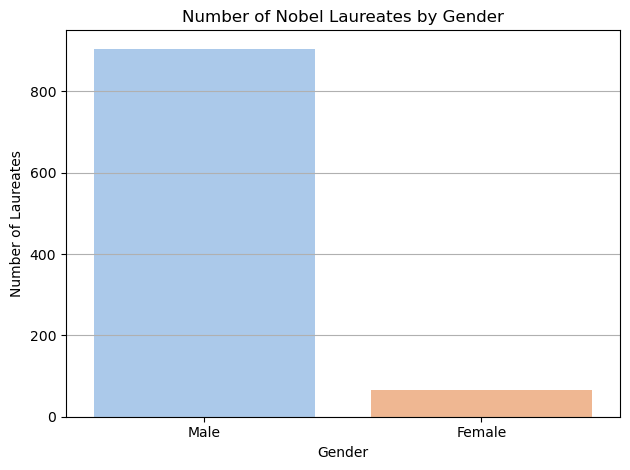

In [25]:
# Count occurrences of each gender
gender_counts = Nobel['sex'].value_counts().reset_index()
# Nobel['sex'].value_counts()→ Returns a Series with counts of each gender (e.g., 'Male': 800, 'Female': 50)
# .reset_index()→ Converts the Series into a DataFrame with two columns:

gender_counts.columns = ['sex', 'count']
# Renames the columns to something clearer:

# Bar plot
sns.barplot(data=gender_counts, x='sex', y='count', hue='sex', palette='pastel', legend=False)
plt.title('Number of Nobel Laureates by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Laureates')
plt.grid(axis='y')
plt.tight_layout() #Adjusts spacing automatically to prevent clipping of labels or titles — useful when working in Jupyter Notebooks.
plt.show()

In [43]:
top_country =  Nobel['birth_country'].value_counts().index[0]

print("The birth country with the most Nobel laureates is :", top_country)

The birth country with the most Nobel laureates is : United States of America


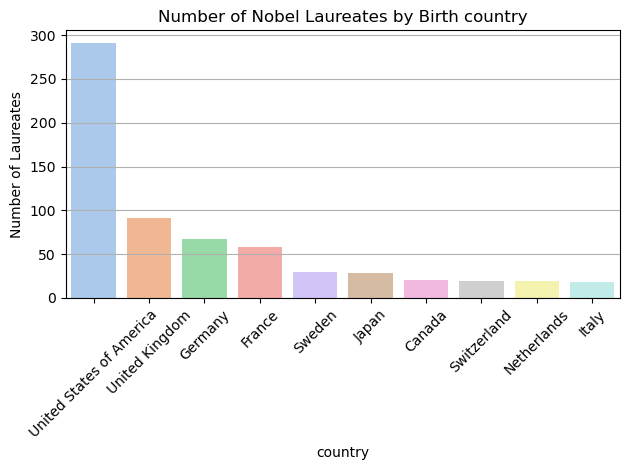

In [46]:
# Get top 10 countries
top_countries = Nobel['birth_country'].value_counts().head(10).reset_index()
#.reset_index()→ Converts the Series into a DataFrame with two columns

top_countries.columns = ['birth_country', 'count']

# Bar plot
sns.barplot(data=top_countries, x='birth_country', y='count', hue='birth_country', palette='pastel', legend=False)
plt.title('Number of Nobel Laureates by Birth country')
plt.xlabel('country')
plt.ylabel('Number of Laureates')
plt.grid(axis='y')
plt.xticks(rotation=45) 
plt.tight_layout() #Adjusts spacing automatically to prevent clipping of labels or titles — useful when working in Jupyter Notebooks.
plt.show()

In [47]:
# To Calculate the proportion of USA born winners per decade first:

# Identify the decade with the highest ratio of US-born winners
Nobel['us_born_winners'] = Nobel['birth_country'] == 'United States of America'


Nobel['decade'] = (np.floor(Nobel['year'] / 10) * 10).astype(int)
# nobel['year'] / 10: converts year to a floating-point decade (e.g., 1971 → 197.1).
# np.floor(...): rounds down to the nearest whole decade (e.g., 197.1 → 197.0).
# * 10: brings it back to the decade format (e.g., 197.0 → 1970.0).
# .astype(int): converts it to integer type (e.g., 1970.0 → 1970).


prop_usa_winners = Nobel.groupby('decade', as_index=False)['us_born_winners'].mean()
# as_index=False means the decade will remain as a column in the resulting DataFrame (not become the index).

prop_usa_winners.head()

,decade,us_born_winners
0,1900,0.017544
1,1910,0.075000
2,1920,0.074074
3,1930,0.250000
4,1940,0.302326


In [48]:
# Identify the decade with the highest proportion of US-born winners
max_decade_usa = prop_usa_winners[prop_usa_winners['us_born_winners'] == prop_usa_winners['us_born_winners'].max()]['decade'].values[0]
max_decade_usa

# ['decade']-Now that we have the filtered row(s), we select the 'decade' column.
# .values = .values turns the selected column into a NumPy array.
# [0] grabs the first (and likely only) value — the decade with the highest US-born winner proportion. a plain integer, not a Series, not an array — just the number.

2000

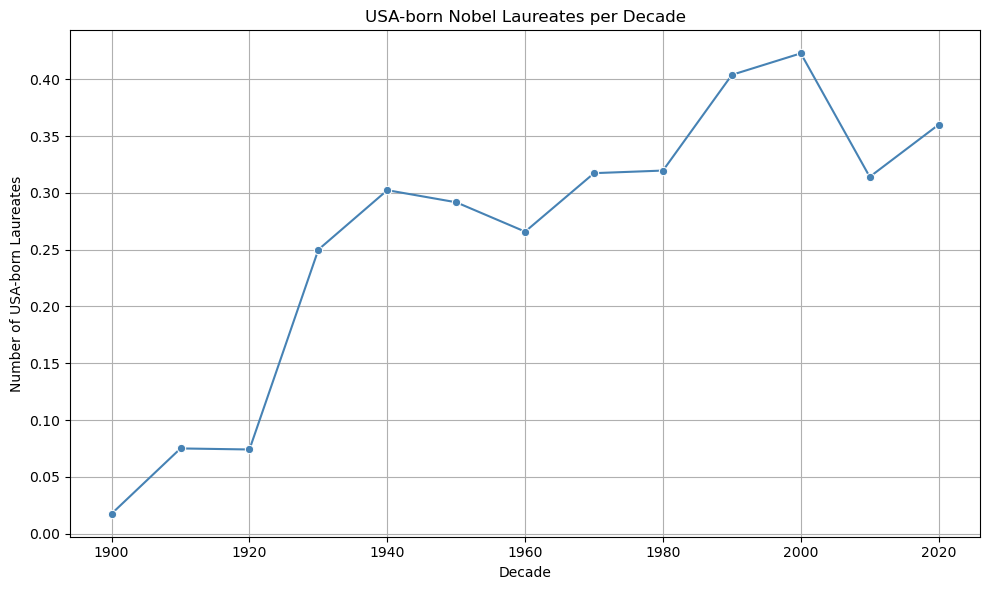

In [51]:
plt.figure(figsize=(10, 6))  # This line sets the size of the entire plot figure (i.e., the width and height of your chart area) 
# before any plot is drawn.

sns.lineplot(x='decade', y='us_born_winners', data=prop_usa_winners, marker='o', color='steelblue')

plt.title('USA-born Nobel Laureates per Decade')
plt.xlabel('Decade')
plt.ylabel('Number of USA-born Laureates')
plt.grid(True)
plt.tight_layout()
plt.show()


In [53]:
# Calculating the proportion of female laureates per decade
Nobel['female_winner'] = Nobel['sex'] == 'Female'

prop_female_winners = Nobel.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()
# as_index=False means the group labels stay as regular columns, not as index values in the result

prop_female_winners.head()

,decade,category,female_winner
0,1900,Chemistry,0.000000
1,1900,Literature,0.100000
2,1900,Medicine,0.000000
3,1900,Peace,0.071429
4,1900,Physics,0.076923


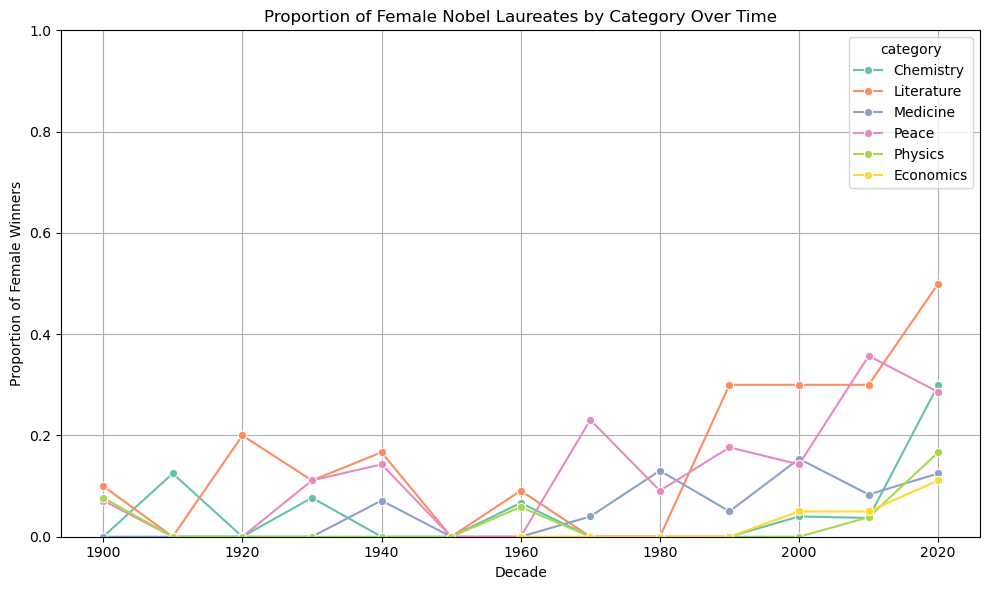

In [55]:
plt.figure(figsize=(10, 6))

sns.lineplot(data=prop_female_winners, x='decade', y='female_winner',hue='category', marker='o', palette='Set2')

plt.title('Proportion of Female Nobel Laureates by Category Over Time')
plt.ylabel('Proportion of Female Winners')
plt.xlabel('Decade')
plt.ylim(0, 1)  # Restricts the y-axis range to between 0 and 1 since you are plotting proportions (where 0 = 0% and 1 = 100%).
plt.grid(True)
plt.tight_layout()
plt.show()


In [56]:
# Find the decade and category with the highest proportion of female laureates
max_female_decade_category = prop_female_winners[prop_female_winners['female_winner'] ==\
prop_female_winners['female_winner'].max()][['decade', 'category']]

max_female_decade_category

,decade,category
68,2020,Literature


In [57]:
# Create a dictionary with the decade and category pair
max_female_dict = {max_female_decade_category['decade'].values[0]: max_female_decade_category['category'].values[0]}
max_female_dict

{2020: 'Literature'}

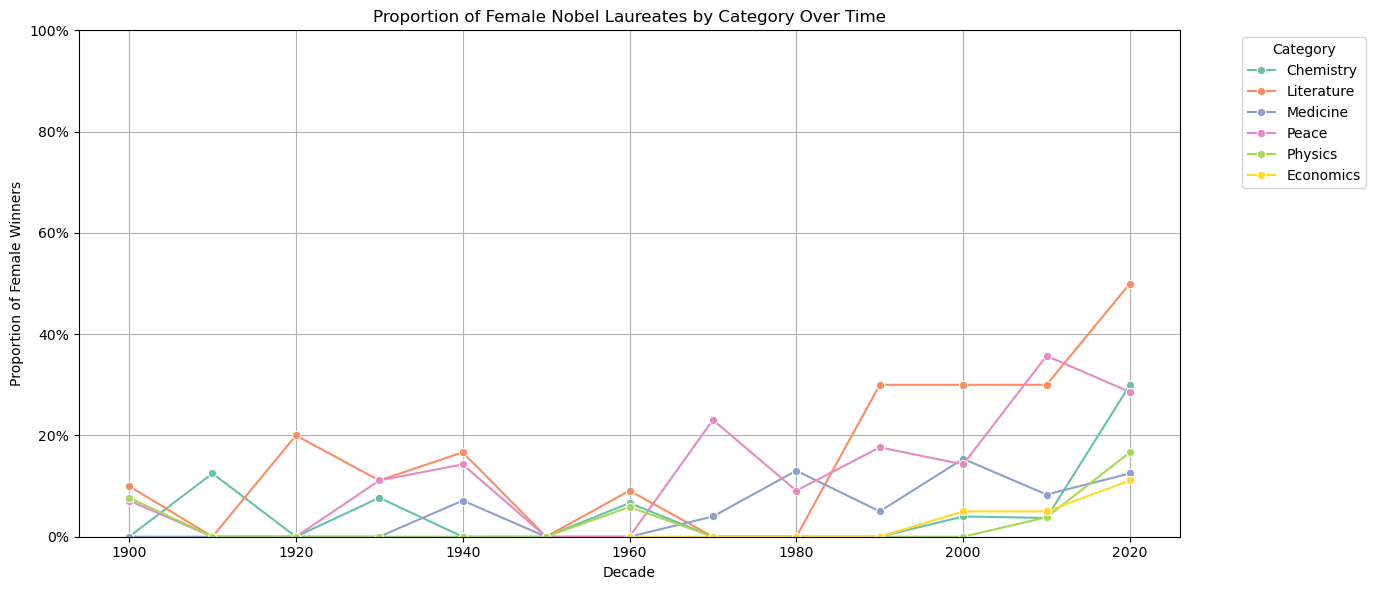

In [62]:
# Optional: Plotting female winners with % winners on the y-axis
# ax2 = sns.relplot(x='decade', y='female_winner', hue='category', data=prop_female_winners, kind="line")
# plt.show()

plt.figure(figsize=(12, 6))  # Set figure size

sns.lineplot(data=prop_female_winners, x='decade', y='female_winner',
    hue='category',         # Separate line for each Nobel category
    marker='o',
    palette='Set2'          # Softer, readable colors
)

# Add title and axis labels
plt.title('Proportion of Female Nobel Laureates by Category Over Time')
plt.xlabel('Decade')
plt.ylabel('Proportion of Female Winners')

# Optional: format y-axis as percentages
plt.ylim(0, 1)
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0], ['0%', '20%', '40%', '60%', '80%', '100%'])

plt.grid(True)        # Light grid for better readability
plt.tight_layout()    # Prevent clipping
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside
plt.show()


In [64]:
# Finding the first woman to win a Nobel Prize
nobel_women = Nobel[Nobel['female_winner']]

min_row = nobel_women[nobel_women['year'] == nobel_women['year'].min()]
first_woman_name = min_row['full_name'].values[0]
first_woman_category = min_row['category'].values[0]
print(f"\n The first woman to win a Nobel Prize was {first_woman_name}, in the category of {first_woman_category}.")


 The first woman to win a Nobel Prize was Marie Curie, née Sklodowska, in the category of Physics.


In [66]:
# Selecting the laureates that have received 2 or more prizes
counts = Nobel['full_name'].value_counts()
repeats = counts[counts >= 2].index
repeat_list = list(repeats)

print("\n The repeat winners are :", repeat_list)


 The repeat winners are : ['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']


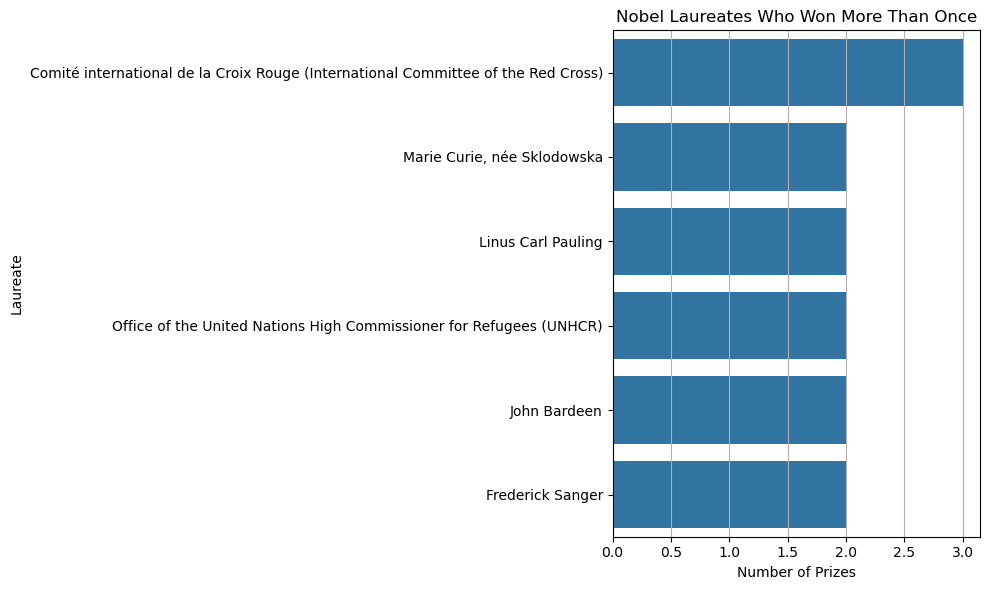

In [75]:
# this gives you the rows in the dataset where the winner appears 
repeat_winners = Nobel[Nobel['full_name'].isin(repeat_list)]

plt.figure(figsize=(10, 6))


# IN THIS STYLE WE REMOVE PALLETE
sns.countplot(
    data=repeat_winners,
    y='full_name',         # Horizontal bars are easier to read for names
    order=repeat_winners['full_name'].value_counts().index
)
# order=repeat_winners_df['full_name'].value_counts().index -Here, you’re sorting them by the number of times they appear 
# (i.e., how many Nobel Prizes they’ve won), from most to least.
# Without this, names might appear randomly or alphabetically, which could be confusing.

plt.title('Nobel Laureates Who Won More Than Once')
plt.xlabel('Number of Prizes')
plt.ylabel('Laureate')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

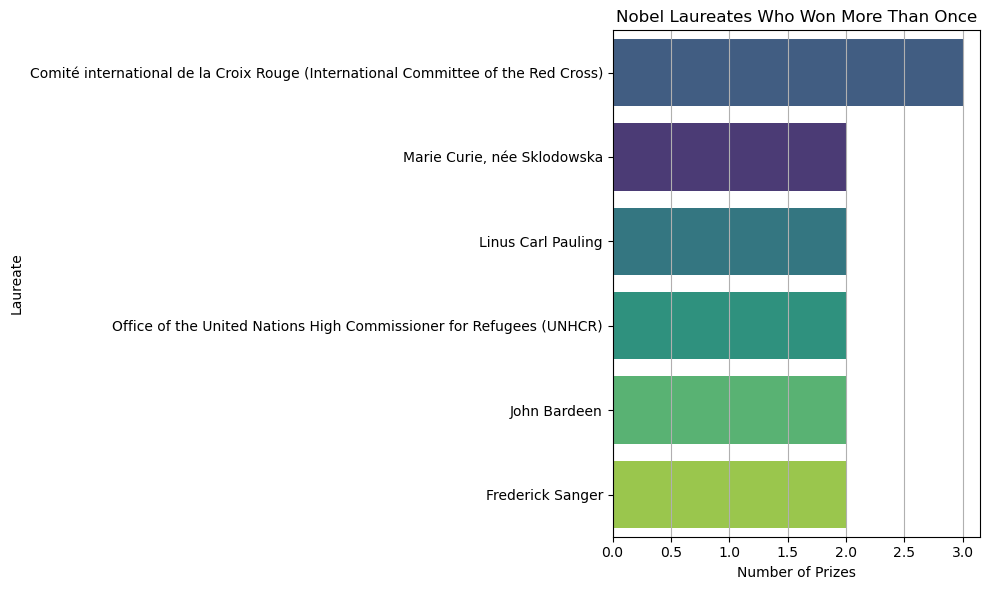

In [77]:
# this gives you the rows in the dataset where the winner appears 
repeat_winners = Nobel[Nobel['full_name'].isin(repeat_list)]

plt.figure(figsize=(10, 6))


sns.countplot(
    data=repeat_winners_df,
    y='full_name',
    order=repeat_winners_df['full_name'].value_counts().index,
    hue='full_name',
    palette='viridis',
    legend=False
)

plt.title('Nobel Laureates Who Won More Than Once')
plt.xlabel('Number of Prizes')
plt.ylabel('Laureate')
plt.grid(axis='x')
plt.tight_layout()
plt.show()